In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [5]:
pip show keras

Name: keras
Version: 2.10.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [6]:
import yfinance as yf
import datetime as dt

stock = "RELIANCE.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
df.shape

(6196, 6)

In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(     'Date',            ''),
            ('Adj Close', 'RELIANCE.NS'),
            (    'Close', 'RELIANCE.NS'),
            (     'High', 'RELIANCE.NS'),
            (      'Low', 'RELIANCE.NS'),
            (     'Open', 'RELIANCE.NS'),
            (   'Volume', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("reliance.csv")

In [11]:
data01 = pd.read_csv("reliance.csv")

In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [13]:
df = df.drop(['Date'], axis = 1)

<ipython-input-13-0cad584de5c9>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



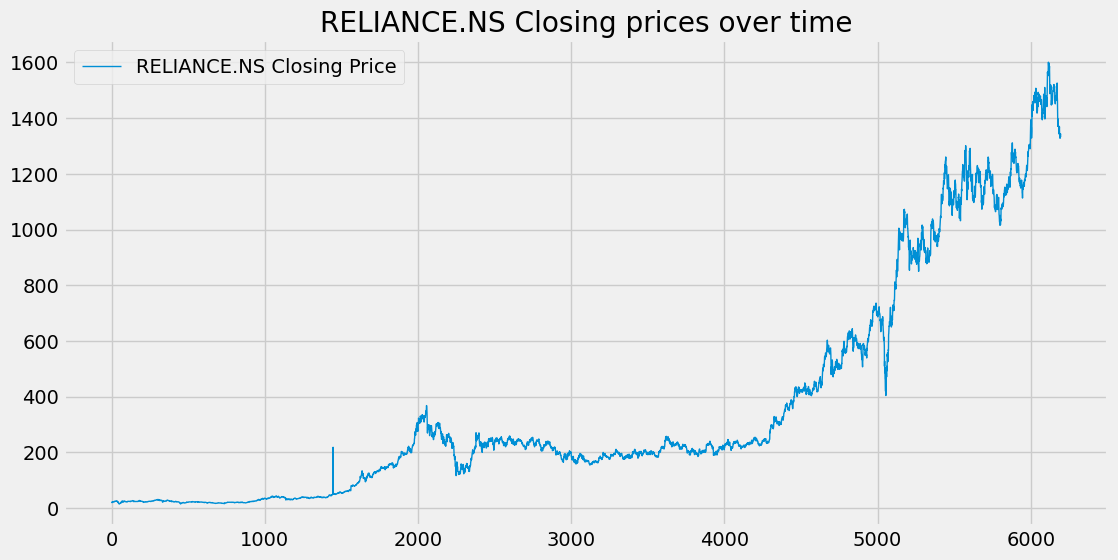

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

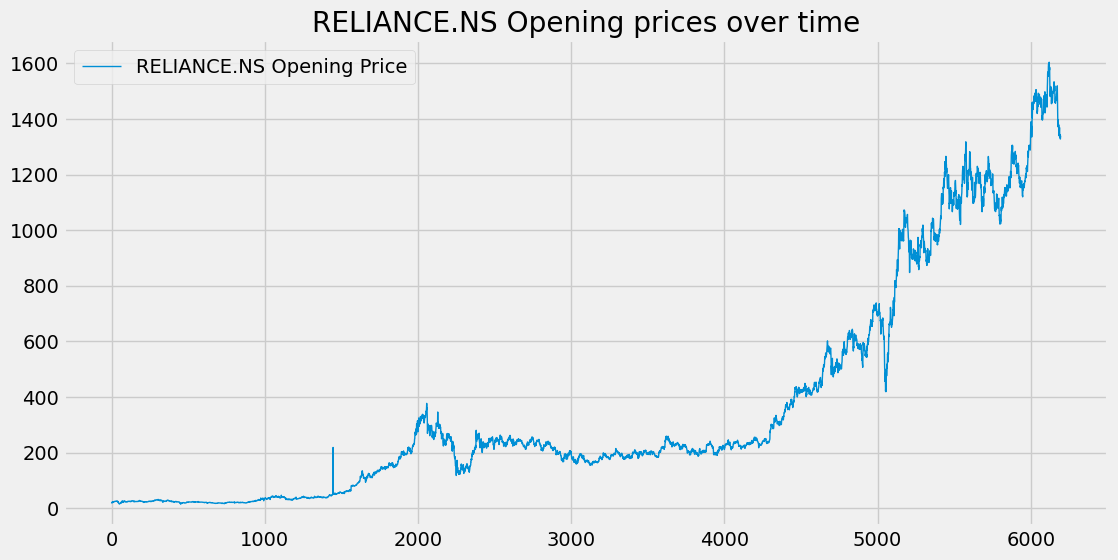

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

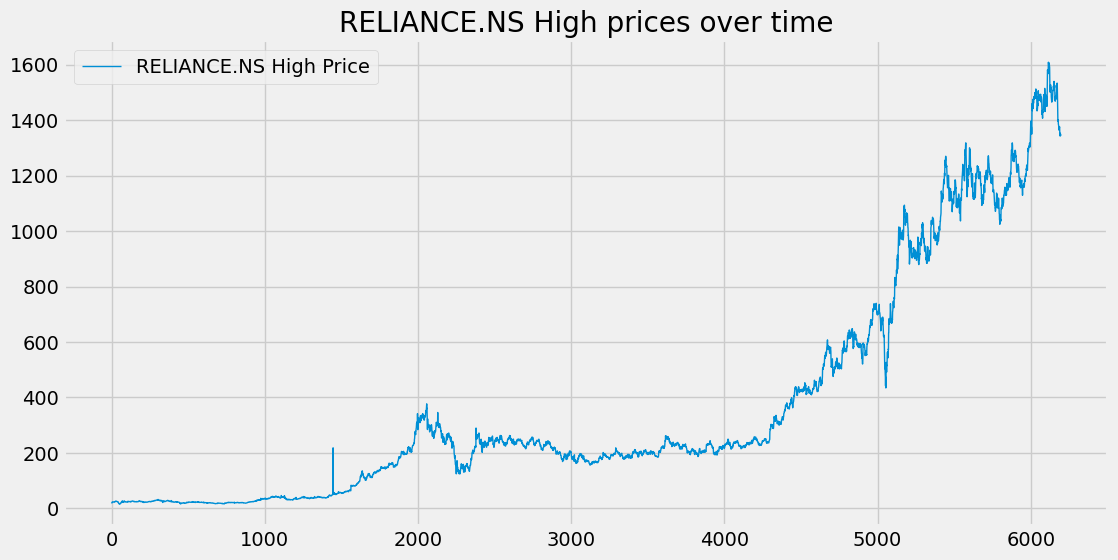

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

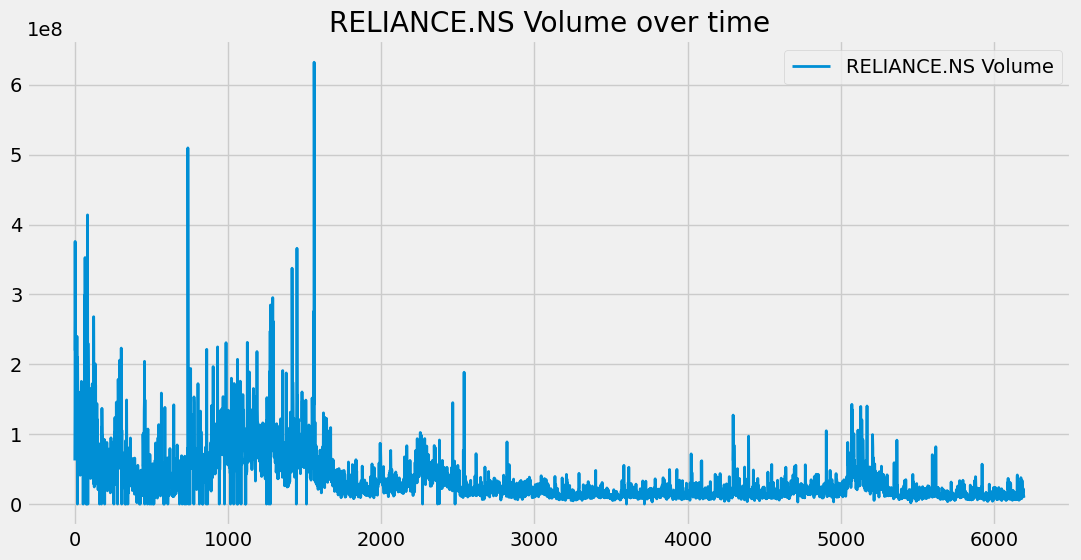

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [18]:
ma100 = df.Close.rolling(100).mean()


In [19]:
mb200 = df.Close.rolling(200).mean()

In [20]:
ma100


Ticker,RELIANCE.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6191,1475.483253
6192,1474.854003
6193,1474.046503
6194,1473.169503


In [21]:
mb200

Ticker,RELIANCE.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6191,1456.512750
6192,1456.726249
6193,1456.934625
6194,1457.134875


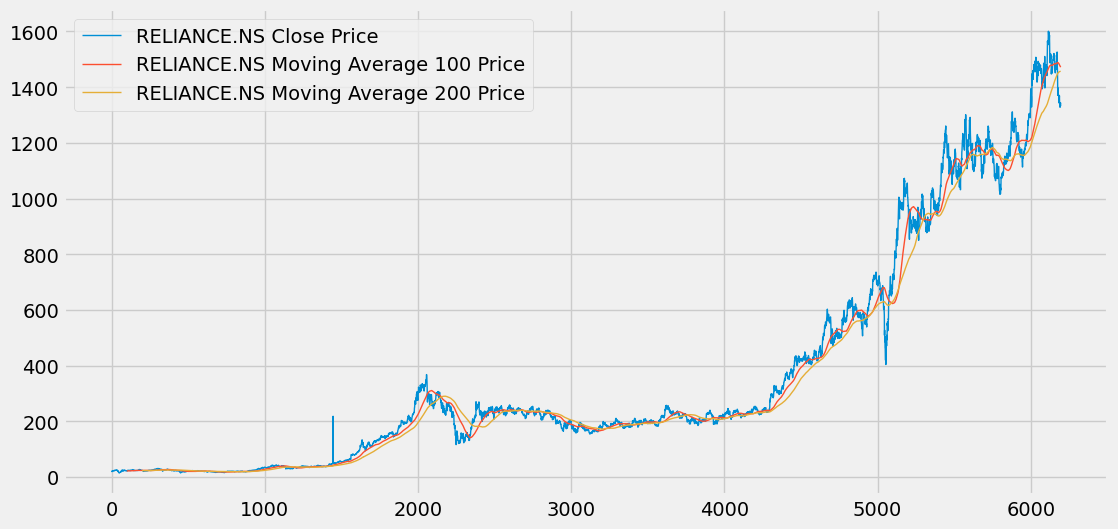

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(mb200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [23]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [24]:
ema200 = df.Close.ewm(span=200, adjust = False).mean()

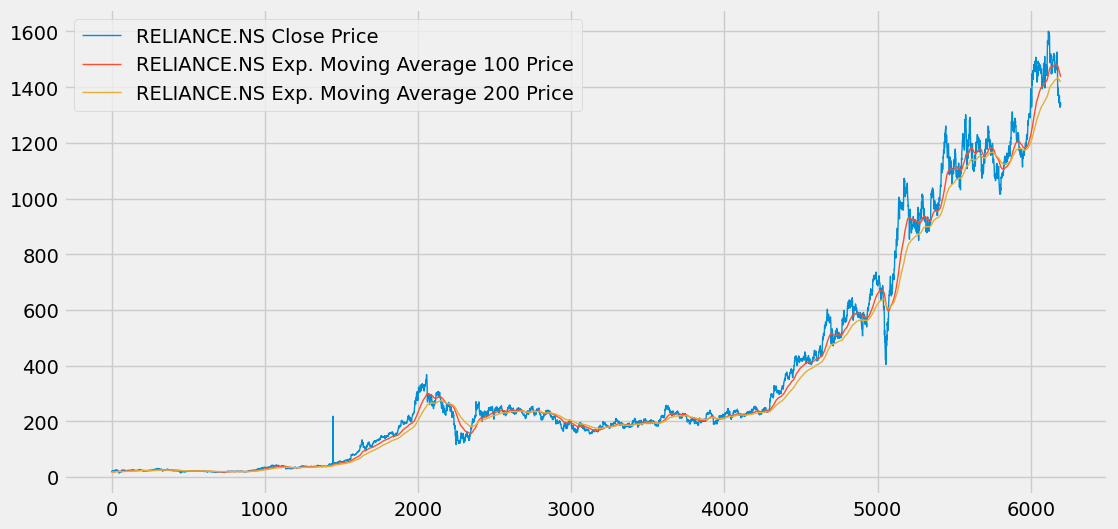

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [26]:

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [27]:
data_training.shape

(4337, 1)

In [28]:
data_testing.shape

(1859, 1)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [30]:
data_training_array = scaler.fit_transform(data_training)

In [31]:
data_training_array

array([[0.00979393],
       [0.01386295],
       [0.01601358],
       ...,
       [0.84429022],
       [0.86559026],
       [0.87522211]])

In [32]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [36]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 40)

Epoch 1/40
133/133 [==============================] - 57s 387ms/step - loss: 0.0189
Epoch 2/40
133/133 [==============================] - 52s 393ms/step - loss: 0.0060
Epoch 3/40
133/133 [==============================] - 49s 370ms/step - loss: 0.0050
Epoch 4/40
133/133 [==============================] - 52s 392ms/step - loss: 0.0045
Epoch 5/40
133/133 [==============================] - 55s 416ms/step - loss: 0.0046
Epoch 6/40
133/133 [==============================] - 52s 389ms/step - loss: 0.0040
Epoch 7/40
133/133 [==============================] - 54s 406ms/step - loss: 0.0035
Epoch 8/40
133/133 [==============================] - 53s 402ms/step - loss: 0.0035
Epoch 9/40
133/133 [==============================] - 51s 385ms/step - loss: 0.0033
Epoch 10/40
133/133 [==============================] - 53s 395ms/step - loss: 0.0030
Epoch 11/40
133/133 [==============================] - 50s 375ms/step - loss: 0.0030
Epoch 12/40
133/133 [==============================] - 49s 366ms/step - lo

In [37]:
past_100_days = data_training.tail(100)

In [38]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [39]:
final_df.head()

Ticker,RELIANCE.NS
0,228.057434
1,226.308777
2,228.068863
3,227.383118
4,227.177399


In [40]:
input_data = scaler.fit_transform(final_df)

In [41]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [42]:
x_test.shape

(1859, 100, 1)

In [43]:
y_predicted = model.predict(x_test)

59/59 [==============================] - 8s 127ms/step


In [44]:
y_predicted.shape

(1859, 1)

In [45]:
scaler.scale_

array([0.00072749])

In [46]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

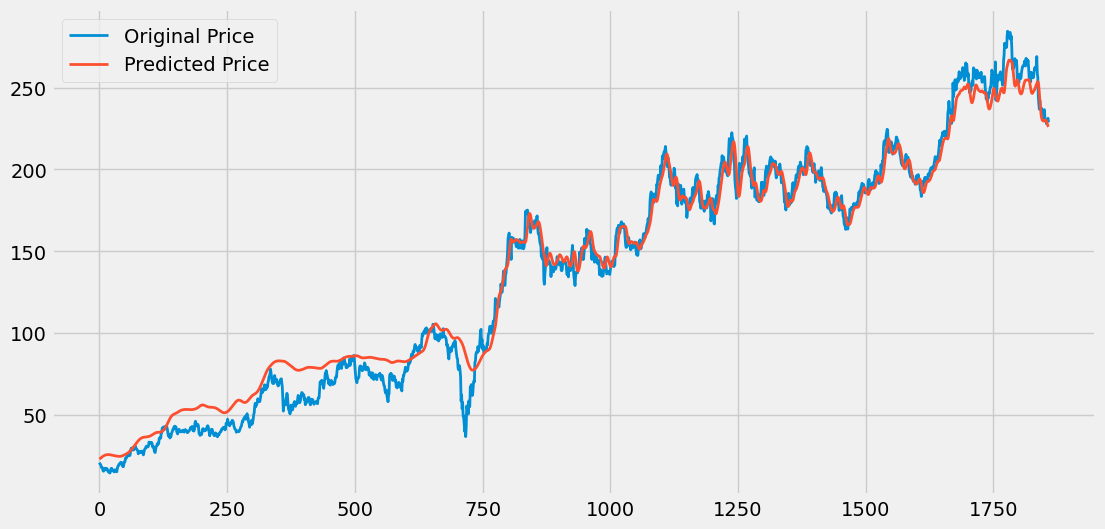

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 2)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 2)
plt.legend()
plt.show()

In [50]:
model.save('stock_dl_model.h5')

In [51]:
from google.colab import files

In [52]:
files .download('stock_dl_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [2]:
pip install tensorflow==2.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 38.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

In [1]:
pip show keras


Name: keras
Version: 2.10.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow
